# CA684 Assignment Submission

# Data Loading

In [1]:
# libraries
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import urllib
from random import choices
from itertools import chain
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
import sparse_dot_topn.sparse_dot_topn as ct

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\romil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
offers_test_df = pd.read_parquet('C:\\Users\\romil\\Downloads\\offers_test.parquet')

# Text Pre-Processing

In [3]:
#Handling null values
offers_test_df = offers_test_df.fillna(value=np.nan)
offers_test_df.fillna('', inplace=True)
offers_test_df.isnull().sum()

offer_id       0
shop           0
lang           0
brand          0
color          0
title          0
description    0
price          0
url            0
image_urls     0
dtype: int64

In [4]:
#Removing Punctuations
offers_test_df['title'] = offers_test_df['title'].str.replace('[^\w\s]','')
offers_test_df['description'] = offers_test_df['description'].str.replace('[^\w\s]','')
offers_test_df['color'] = offers_test_df['color'].str.replace('[^\w\s]','')
offers_test_df['brand'] = offers_test_df['brand'].str.replace('[^\w\s]','')

C:\Users\romil\AppData\Local\Temp/ipykernel_23924/2921070601.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  offers_test_df['title'] = offers_test_df['title'].str.replace('[^\w\s]','')
C:\Users\romil\AppData\Local\Temp/ipykernel_23924/2921070601.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  offers_test_df['description'] = offers_test_df['description'].str.replace('[^\w\s]','')
C:\Users\romil\AppData\Local\Temp/ipykernel_23924/2921070601.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  offers_test_df['color'] = offers_test_df['color'].str.replace('[^\w\s]','')
C:\Users\romil\AppData\Local\Temp/ipykernel_23924/2921070601.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  offers_test_df['brand'] = offers_test_df['brand'].str.replace('[^\w\s]','')


In [5]:
#Lowercasing
offers_test_df['title'] = offers_test_df['title'].apply(lambda x: " ".join(x.lower() for x in x.split()))
offers_test_df['description'] = offers_test_df['description'].apply(lambda x: " ".join(x.lower() for x in x.split()))
offers_test_df['color'] = offers_test_df['color'].apply(lambda x: " ".join(x.lower() for x in x.split()))
offers_test_df['brand'] = offers_test_df['brand'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [6]:
#Removing Stopwords
stop=stopwords.words('german')
offers_test_df['title']= offers_test_df['title'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
offers_test_df['title'] = offers_test_df['title'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
offers_test_df['description']= offers_test_df['description'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
offers_test_df['description'] = offers_test_df['description'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
offers_test_df['color']= offers_test_df['color'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
offers_test_df['color'] = offers_test_df['color'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
offers_test_df['brand']= offers_test_df['brand'].apply(lambda x: re.sub('[^A-Za-z0-9]+', ' ', x))
offers_test_df['brand'] = offers_test_df['brand'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [7]:
#Stemming
st = PorterStemmer()
offers_test_df['title'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
offers_test_df['description'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
offers_test_df['color'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
offers_test_df['brand'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

offers_test_df.head()

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls
0,67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,dkny,beige beige,schal,marke dkny gru00f6u00dfenlauf unisex onesize o...,49.99,https://www.aboutyou.de/p/dkny/schal-7221536,[https://cdn.aboutstatic.com/file/images/d8432...
1,c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,michael michael kors,schwarz mischfarben,plisseerock,marke michael michael kors gru00f6u00dfenlauf ...,79.98,https://www.aboutyou.de/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/687cd...
2,7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,michael michael kors,hellbraun mokka braun,tasche,zielgruppe female gru00f6u00dfe volumen klein ...,349.0,https://www.aboutyou.at/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/56cd9...
3,5f42a01e-32e0-4e96-9434-4c2faf4346d1,aboutyou,de,ragwear,blau blau,winterjacke ashani puffy,marke ragwear zielgruppe frauen lu00e4nge lang...,175.0,https://www.aboutyou.at/p/ragwear/winterjacke-...,[https://cdn.aboutstatic.com/file/images/56fe6...
4,649b7eeb-30be-4bee-9b45-b01f378ba11a,zalando,de,sams e sams e,dunkelblau,averie shorts stoffhose,main supplier code k71977 name suffix sky capt...,129.685455,https://www.zalando.de/lookup/article/SA321S00...,[https://img01.ztat.net/article/93b0febd02a34b...


# Matching

## Feature Engineering

In [8]:
#Concatinating (Title, Color, Brand) to create new feature to compare between products
offers_test_df['compare']=offers_test_df['title'].astype(str)+' '+offers_test_df['color'].astype(str)+' '+offers_test_df['brand'].astype(str)
offers_test_df.head()

,offer_id,shop,lang,brand,color,title,description,price,url,image_urls,compare
0,67069c3c-46a7-45ea-ae0f-1cac2571ae68,aboutyou,de,dkny,beige beige,schal,marke dkny gru00f6u00dfenlauf unisex onesize o...,49.99,https://www.aboutyou.de/p/dkny/schal-7221536,[https://cdn.aboutstatic.com/file/images/d8432...,schal beige beige dkny
1,c065bcd3-0669-4061-b1ce-fd6467f81b91,aboutyou,de,michael michael kors,schwarz mischfarben,plisseerock,marke michael michael kors gru00f6u00dfenlauf ...,79.98,https://www.aboutyou.de/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/687cd...,plisseerock schwarz mischfarben michael michae...
2,7dfb8ecf-ba37-42dc-9287-78bac2b0e192,aboutyou,de,michael michael kors,hellbraun mokka braun,tasche,zielgruppe female gru00f6u00dfe volumen klein ...,349.0,https://www.aboutyou.at/p/michael-michael-kors...,[https://cdn.aboutstatic.com/file/images/56cd9...,tasche hellbraun mokka braun michael michael kors
3,5f42a01e-32e0-4e96-9434-4c2faf4346d1,aboutyou,de,ragwear,blau blau,winterjacke ashani puffy,marke ragwear zielgruppe frauen lu00e4nge lang...,175.0,https://www.aboutyou.at/p/ragwear/winterjacke-...,[https://cdn.aboutstatic.com/file/images/56fe6...,winterjacke ashani puffy blau blau ragwear
4,649b7eeb-30be-4bee-9b45-b01f378ba11a,zalando,de,sams e sams e,dunkelblau,averie shorts stoffhose,main supplier code k71977 name suffix sky capt...,129.685455,https://www.zalando.de/lookup/article/SA321S00...,[https://img01.ztat.net/article/93b0febd02a34b...,averie shorts stoffhose dunkelblau sams e sams e


## Creating TFIDF Word Vectors

In [9]:
def ngrams(string, n=3):
    string = re.sub(r'[,-./]|\sBD',r'', string)
    ngrams = zip(*[string[i:] for i in range(n)])
    return [''.join(ngram) for ngram in ngrams]

In [10]:
compare=offers_test_df['compare']
vectorizer = TfidfVectorizer(min_df=1, analyzer=ngrams)
tf_idf_matrix = vectorizer.fit_transform(compare)

## Calculating Cosine Similarity between TFIDF word vectors

In [11]:
def calculate_cosine_similarity(matrix_rows, matrix_columns, number_of_matches, minimum_similarity):
    matrix_rows = matrix_rows.tocsr()
    matrix_columns = matrix_columns.tocsr()
    M, _ = matrix_rows.shape
    _, N = matrix_columns.shape
    idx_dtype = np.int32
    nnz_max = M*number_of_matches
    indptr = np.zeros(M+1, dtype=idx_dtype)
    indices = np.zeros(nnz_max, dtype=idx_dtype)
    data = np.zeros(nnz_max, dtype=matrix_rows.dtype)

    ct.sparse_dot_topn(
        M, N, np.asarray(matrix_rows.indptr, dtype=idx_dtype),
        np.asarray(matrix_rows.indices, dtype=idx_dtype),
        matrix_rows.data,
        np.asarray(matrix_columns.indptr, dtype=idx_dtype),
        np.asarray(matrix_columns.indices, dtype=idx_dtype),
        matrix_columns.data,
        number_of_matches,
        minimum_similarity,
        indptr, indices, data)

    return csr_matrix((data,indices,indptr),shape=(M,N))

In [12]:
matches = calculate_cosine_similarity(tf_idf_matrix, tf_idf_matrix.transpose(), 2, 0.5)

In [13]:
def create_matches_df(cosine_similarity_matrix, compare, max):
    non_zeros = cosine_similarity_matrix.nonzero()
    matrixrows = non_zeros[0]
    matrixcols = non_zeros[1]
    if max:
        nr_matches = max
    else:
        nr_matches = matrixcols.size
    
    matched_offer1 = np.empty([nr_matches], dtype=object)
    matched_offer2 = np.empty([nr_matches], dtype=object)
    similarity = np.zeros(nr_matches)
    
    for index in range(0, nr_matches):
        matched_offer1[index] = compare[matrixrows[index]]
        matched_offer2[index] = compare[matrixcols[index]]
        similarity[index] = cosine_similarity_matrix.data[index]
    
    return pd.DataFrame({'matched_offer1': matched_offer1, 'matched_offer2': matched_offer2, 'similarity': similarity})

In [14]:
matches_df = create_matches_df(matches, compare, max=100000)

#Removing first exact matched of offer with self
matches_df = matches_df[matches_df['similarity'] < 0.99999]
#Arrangin in ascending order of similarity of matches
matches_df=matches_df.sort_values(['similarity'], ascending=False)
#Resetting index for further processing
matches_df=matches_df.reset_index(drop=True)

In [15]:
matches_df.head()

,matched_offer1,matched_offer2,similarity
0,tshirt chrome pink pink samsoe samsoe,shirt chrome pink pink samsoe samsoe,0.995618
1,tshirt alder grau grau knowledgecotton apparel,shirt alder grau grau knowledgecotton apparel,0.995119
2,shirt krown hellgr n gr n modstr m,tshirt krown hellgr n gr n modstr m,0.993593
3,james bond 007 for women ii eau de parfum eau ...,james bond 007 for women iii eau de parfum eau...,0.993547
4,tshirt eyben gr n gr n gstar raw,shirt eyben gr n gr n gstar raw,0.993511


In [16]:
def avoiding_matches_in_same_shop(matches_df):
    i=0
    for i in range(len(matches_df)):
        shop1=offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0][1]
        shop2=offers_test_df[offers_test_df['compare']==matches_df.loc[i][1]].iloc[0][1]
        if shop1==shop2:
            matches_df.drop(i, inplace=True)

avoiding_matches_in_same_shop(matches_df)

#Resetting index for further processing
matches_df=matches_df.reset_index(drop=True)

In [17]:
matches_df.shape

(1810, 3)

## Reverse engineering matches in terms of offerIDs

In [18]:
zalando_offer_id=[]
aboutyou_offer_id=[]
i=0
for i in range(len(matches_df)):
    shop=offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0][1]
    if(shop=='zalando'):
        zalando_offer_id.append(offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0][0])
        aboutyou_offer_id.append(offers_test_df[offers_test_df['compare']==matches_df.loc[i][1]].iloc[0][0])
    else:
        aboutyou_offer_id.append(offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0][0])
        zalando_offer_id.append(offers_test_df[offers_test_df['compare']==matches_df.loc[i][1]].iloc[0][0])
        
matches_test_predicted=pd.DataFrame(list(zip(zalando_offer_id, aboutyou_offer_id)), columns =['zalando', 'aboutyou'])
matches_test_predicted.head(10)


,zalando,aboutyou
0,5f3e891f-33c9-40ac-8f82-65eb97131b1b,3fc0a792-c083-41aa-9f82-02f297a50b1c
1,47e34e77-e1f8-4f76-a727-c51388d4cbe0,e518eb69-015e-4939-b2c9-d82298d1147b
2,40d8c7ef-854d-4028-a46a-44bf3e42c490,3875c7a5-ac32-472f-a644-da78cbf7e829
3,980b2af3-b47e-4719-9021-57c929b3f73b,00af3b32-5fbe-44c6-ae0e-356a864bd53a
4,a1a7e43a-512b-44a4-9b0a-5c2b316a27d0,c6b1578a-ed0a-43a8-8f61-95e928850629
5,65575ea7-c0f1-4d74-bb1f-dde54eb0e253,61b7820b-cc58-4d8c-9f5d-8ed71a6b7280
6,65575ea7-c0f1-4d74-bb1f-dde54eb0e253,61b7820b-cc58-4d8c-9f5d-8ed71a6b7280
7,52f11443-fc34-4f68-88e7-16b2b1d579c3,a40841b4-3f96-4025-a858-179b61b0ec7e
8,93b0aea6-84bc-4288-9ec0-ce72c7611db2,20ff3a1c-0c89-4afc-9642-666cd7fcb1da
9,cd02827e-df1d-43ff-a5b1-082699146bec,ed7bb6b0-e44a-442a-a8a1-1e1f0f1c7cf2


In [19]:
matches_test_predicted.to_parquet('matches_test_predicted.parquet')
matches_test_predicted.to_csv('matches_test_predicted.csv')

# Evaluation

In [20]:
def plot_images(product):
    
    # Data
    images = product['image_urls']
    
    # Plot it!
    fig, axes = plt.subplots(nrows=1, ncols=len(images), figsize=(12, 4), dpi=100)
    
    if len(images) > 1:     
        axes = axes.flatten()
        for i, axis in enumerate(axes):
            url = images[i]
            image = np.array(Image.open(urllib.request.urlopen(url)))
            axis.imshow(image)
            axis.axis('off')
    else:
        url = images[0]
        image = np.array(Image.open(urllib.request.urlopen(url)))
        axes.imshow(image)
        axes.axis('off')

    fig.tight_layout()
    plt.show()

Matched_Offer1 Shop:
aboutyou


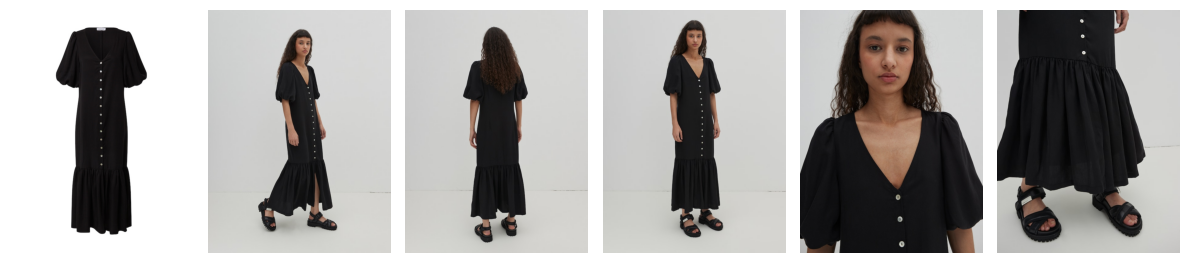

Matched_Offer2 Shop:
zalando


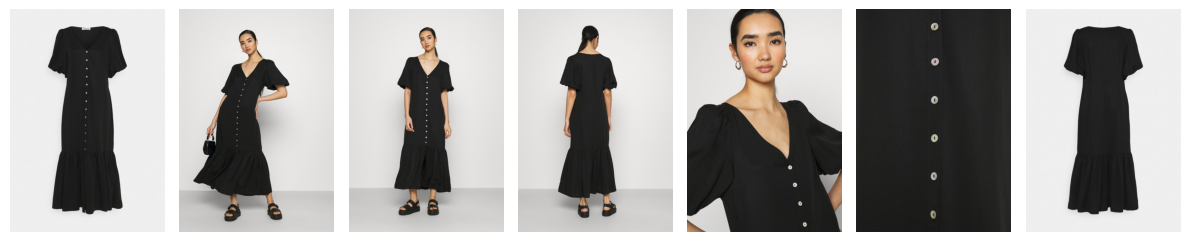

Matched_Offer1 Shop:
zalando


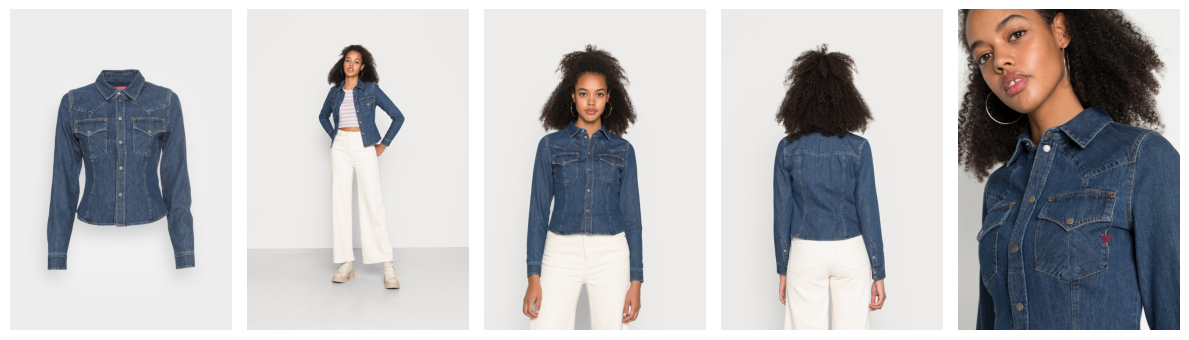

Matched_Offer2 Shop:
aboutyou


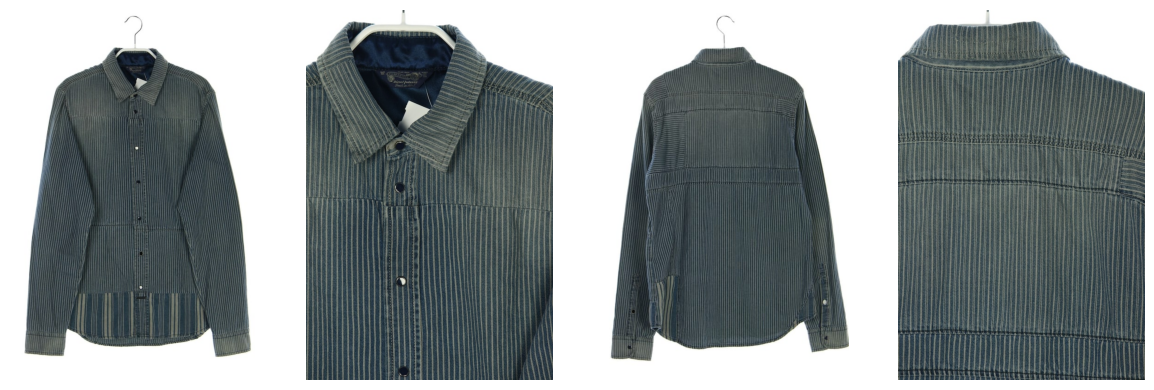

Matched_Offer1 Shop:
zalando


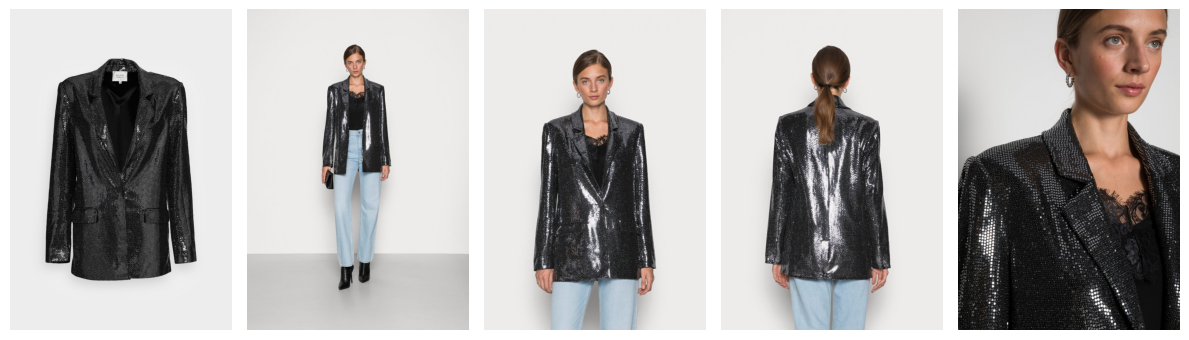

Matched_Offer2 Shop:
aboutyou


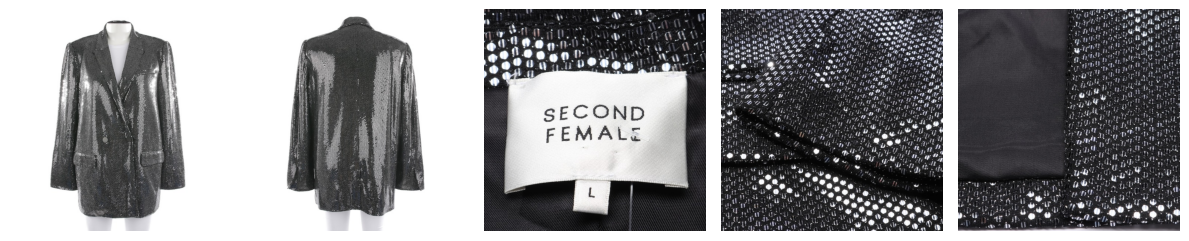

In [21]:
def visual_confirmaton2(i):
    print ("Matched_Offer1 Shop:" )
    print(offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0][1])
    plot1=offers_test_df[offers_test_df['compare']==matches_df.loc[i][0]].iloc[0]
    plot_images(plot1)
    print ("Matched_Offer2 Shop:" )
    print(offers_test_df[offers_test_df['compare']==matches_df.loc[i][1]].iloc[0][1])
    plot2=offers_test_df[offers_test_df['compare']==matches_df.loc[i][1]].iloc[0]
    plot_images(plot2)

visual_confirmaton2(1427)
visual_confirmaton2(1670)
visual_confirmaton2(1631)